In [1]:
#imports
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
from scipy.interpolate import interp1d
from math import *
import csv
from pathlib import Path

In [2]:
# function definitions
# normalized root mean squared error
def nRMSE(y_ana, y_num):
    assert len(y_ana)==len(y_num), "number of analytical solutions y_ana must equalt number of numerical solutions y_num"
    n = len(y_ana)
    rmse = np.sqrt(np.sum(np.square(y_ana-y_num))/n)
    return rmse/np.abs(np.mean(y_ana)) 

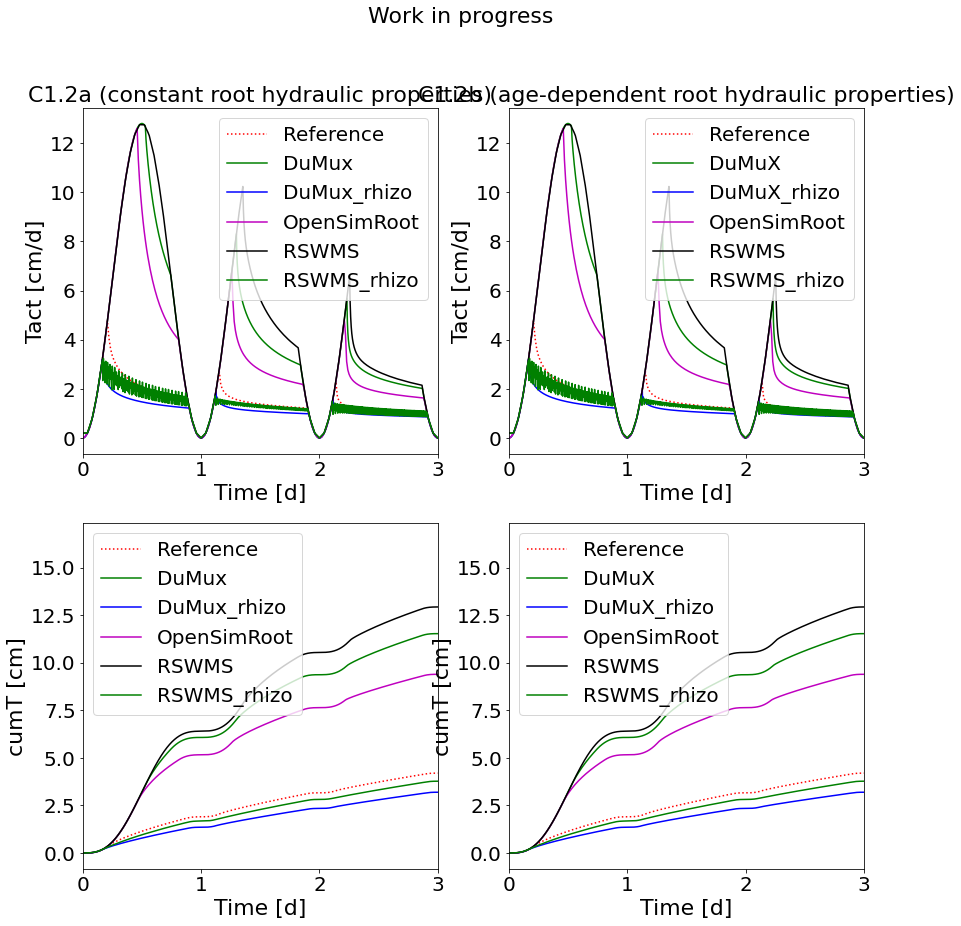

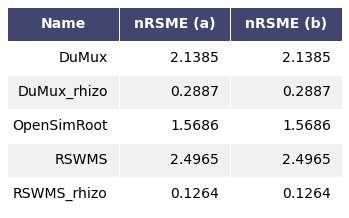

In [4]:


fig, ax = plt.subplots(2, 2, figsize=(14,14)) 
col = ["g-", "b-", "m-", "k-"]*2

# C1.2a
#reference solution
data = np.loadtxt("C1.2a Numerical results/"+"Reference.csv",delimiter=';')  
t_a=data[0,:]; y_a=data[1,:]; cumy_a = integrate.cumtrapz(data[1,:],data[0,:],initial=0)
pl, = ax[0,0].plot(t_a,y_a,'r:')
pl, = ax[1,0].plot(t_a,integrate.cumtrapz(y_a,t_a,initial=0),'r:')  
l, nrmsea, namea =["Reference"], [], []
for dirname, dirnames, filenames in os.walk('C1.2a Numerical results/.'):
    filenames.sort()
    for i,f in enumerate(filenames):
        try:
            if Path(f).stem != "Reference":
                l.append(Path(f).stem);
                data = np.loadtxt("C1.2a Numerical results/"+f,delimiter=';')  
                pl, = ax[0,0].plot(data[0,:],data[1,:],col[i])
                pl, = ax[1,0].plot(data[0,:],integrate.cumtrapz(data[1,:],data[0,:],initial=0),col[i])                  
                interp = interp1d(data[0,:], integrate.cumtrapz(data[1,:],data[0,:],initial=0),  kind='linear', fill_value='extrapolate', bounds_error =False ) 
                cumy_n = interp(t_a) 
                nrmsea.append(nRMSE(cumy_a, cumy_n))
                namea.append(f)
        except Exception as ex:
            print("Something went wrong with file "+f)    
            print(ex)  
ax[0,0].set_xlabel("Time [d]")  
ax[0,0].set_ylabel("Tact [cm/d]")  
#l.append("Reference");
ax[0,0].legend(l) 
ax[0,0].title.set_text("C1.2a (constant root hydraulic properties)")
ax[0,0].set_xlim(0,3)
ax[1,0].set_xlabel("Time [d]")  
ax[1,0].set_ylabel("cumT [cm]")  
ax[1,0].legend(l) 
ax[1,0].set_xlim(0,3)

# C1.2b
#reference solution
data = np.loadtxt("C1.2b Numerical results/"+"Reference.csv",delimiter=';')  
t_a=data[0,:]; y_a=data[1,:]; cumy_a = integrate.cumtrapz(data[1,:],data[0,:],initial=0)
pl, = ax[0,1].plot(t_a,y_a,'r:')
pl, = ax[1,1].plot(t_a,integrate.cumtrapz(y_a,t_a,initial=0),'r:')  
l, nrmseb, nameb =["Reference"], [], []
for dirname, dirnames, filenames in os.walk('C1.2b Numerical results/.'):
    filenames.sort()
    for i,f in enumerate(filenames):
        try:
            l.append(Path(f).stem); 
            if Path(f).stem != "Reference":
                data = np.loadtxt("C1.2a Numerical results/"+f,delimiter=';')  
                pl, = ax[0,1].plot(data[0,:],data[1,:],col[i])
                pl, = ax[1,1].plot(data[0,:],integrate.cumtrapz(data[1,:],data[0,:],initial=0),col[i])                  
                interp = interp1d(data[0,:], integrate.cumtrapz(data[1,:],data[0,:],initial=0),  kind='linear', fill_value='extrapolate', bounds_error =False ) 
                cumy_n = interp(t_a) 
                nrmseb.append(nRMSE(cumy_a, cumy_n))
                nameb.append(Path(f).stem)           
        except Exception as ex:
            print("Something went wrong with file "+f)    
            print(ex)  
ax[0,1].set_xlabel("Time [d]")  
ax[0,1].set_xlim(0,3)
ax[0,1].set_ylabel("Tact [cm/d]")  
ax[0,1].legend(l)            
ax[1,1].set_xlabel("Time [d]")  
ax[1,1].set_ylabel("cumT [cm]")  
ax[1,1].set_xlim(0,3)
ax[1,1].legend(l) 
ax[0,1].title.set_text("C1.2b (age-dependent root hydraulic properties)")

plt.rc('font', size=22)          # controls default text sizes
plt.rc('axes', titlesize=22)     # fontsize of the axes title
plt.rc('axes', labelsize=22)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=20)    # fontsize of the tick labels
plt.rc('ytick', labelsize=20)    # fontsize of the tick labels
plt.rc('legend', fontsize=20)    # legend fontsize
plt.rc('figure', titlesize=22)  # fontsize of the figure title
plt.savefig('c12_results.png', dpi=300, bbox_inches = "tight")
fig.suptitle("Work in progress")
plt.show() 


import pandas as pd 
# initialize list of lists 
data_ = np.array([namea, nrmsea, nrmseb]); #data_b = pandas.concat([data_, additional], axis=1)
data_ = np.array(data_.transpose())

# Create the pandas DataFrame 
df = pd.DataFrame(data_, columns = ['Name','nRSME (a)','nRSME (b)'] )
df['nRSME (a)'] = df['nRSME (a)'].astype(float)
df['nRSME (a)'] = df['nRSME (a)'].map('{:,.4f}'.format)
df['nRSME (b)'] = df['nRSME (b)'].astype(float)
df['nRSME (b)'] = df['nRSME (b)'].map('{:,.4f}'.format)
# print dataframe. 
df.style.set_table_styles(
[{'selector': 'tr:nth-of-type(odd)',
  'props': [('background', '#eee')]}, 
 {'selector': 'tr:nth-of-type(even)',
  'props': [('background', 'white')]},
 {'selector': 'th',
  'props': [('background', '#606060'), 
            ('color', 'white'),
            ('font-family', 'verdana')]},
 {'selector': 'td',
  'props': [('font-family', 'verdana')]},
]
).hide_index()
import six
def render_mpl_table(data, col_width=3.0, row_height=0.625, font_size=14,
                     header_color='#40466e', row_colors=['#f1f1f2', 'w'], edge_color='w',
                     bbox=[0, 0, 1, 1], header_columns=0,
                     ax=None, **kwargs):
    if ax is None:
        size = (np.array(data.shape[::-1]) + np.array([0, 1])) * np.array([col_width, row_height])
        fig, ax = plt.subplots(figsize=size)
        ax.axis('off')
    mpl_table = ax.table(cellText=data.values, bbox=bbox, colLabels=data.columns, **kwargs)
    mpl_table.auto_set_font_size(False)
    mpl_table.set_fontsize(font_size)

    for k, cell in mpl_table._cells.items():
        cell.set_edgecolor(edge_color)
        if k[0] == 0 or k[1] < header_columns:
            cell.set_text_props(weight='bold', color='w')
            cell.set_facecolor(header_color)
        else:
            cell.set_facecolor(row_colors[k[0]%len(row_colors) ])
    return ax.get_figure(), ax

fig,ax = render_mpl_table(df, header_columns=0, col_width=2.0)
fig.savefig("table_c12.png")
